# Aufgabe 29

## a)

Die Antwortmatrix beschreibt die "Detektorantwort", also Messung, aus einem Bin.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
np.random.seed(0)

In [10]:
def Matrix(Dimension, Epsilon):
    C = diags([Epsilon, 1-2*Epsilon, Epsilon], [-1, 0, 1], shape=(Dimension, Dimension)).toarray()
    C[0][0]=C[Dimension-1][Dimension-1]=1-Epsilon
    return C
print('Test für 5x5:')
Matrix(5, 0.23)



Test für 5x5:


array([[0.77, 0.23, 0.  , 0.  , 0.  ],
       [0.23, 0.54, 0.23, 0.  , 0.  ],
       [0.  , 0.23, 0.54, 0.23, 0.  ],
       [0.  , 0.  , 0.23, 0.54, 0.23],
       [0.  , 0.  , 0.  , 0.23, 0.77]])

## b)

In [11]:
f=np.array([193, 485, 664, 763, 804, 805, 779, 736, 684, 626, 
            566, 508, 452, 400, 351, 308, 268, 233, 202, 173])
A=Matrix(20, 0.23)
g=np.dot(A, f)
print('g = ', g, '\n')
gmess=np.random.poisson(g)
print('Die poisson gezogenden g sind dann: ', gmess)

g =  [260.16 459.01 645.6  749.66 794.8  798.79 775.09 733.93 682.62 625.54
 566.46 508.46 452.92 400.69 352.38 308.69 269.15 233.92 202.46 179.67] 

Die poisson gezogenden g sind dann:  [262 465 640 745 873 825 780 684 705 623 534 510 438 398 358 346 262 243
 209 167]


## c)

Mit der Faltungsgleichung  $g=A\cdot f$
und der Diagonalbasis $A=U\cdot D \cdot A^{-1}$ folgt: 
\begin{equation}
     U^{-1}\cdot g = D \cdot U^{-1} f .
\end{equation}

In [12]:
Werte, Vektoren = np.linalg.eig(A)
Index=Werte.argsort()
Werte=Werte[Index]
Vektoren=Vektoren[:,Index]


## d)

In [13]:
U=Vektoren
Uinv=np.linalg.inv(U)

D=np.diag(Werte)
Dinv=np.linalg.inv(D)

b=Uinv @ f
c=Uinv @ gmess
kg=np.diag(gmess)


In [14]:
Vg = np.diag(gmess) #Kovarianzmatrix von gmess
B = Dinv@Uinv 
bvb = B@Vg@B.T 
bvbvar = np.diag(bvb)
bvbstan = np.sqrt(bvbvar)
bvbskal = np.abs(b/bvbstan) 

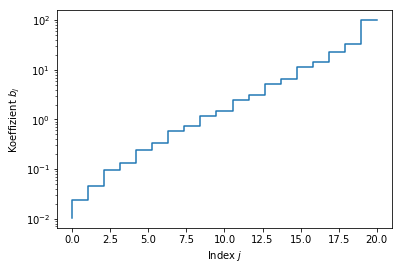

In [15]:
x=np.linspace(0,np.size(bvbskal),np.size(bvbskal)) 
plt.step(x, bvbskal,)
plt.yscale('log')
plt.xlabel(r'Index $j$')
plt.ylabel(r'Koeffizient $b_j$')
plt.show()